# Eine erste Zeitreihe simulieren

Wir wollen einige Szenarios simulieren, bei denen wir als Eingabe Sensorzeitreihen haben und den Abnutzungsgrad eines Bauteiles oder eine Maschine vorhersagen wollen.

Hierbei sind verschiedene Situationen möglich:
- in nur einer oder in mehreren der Eingabezeitreihen gibt es Signale, die mit dem Abnutzungsgrad zu tun haben
- die Signale treten als Einzelereignis auf bzw. zeigen sich als Trendentwicklung
- der Abnutzungsgrad ist ein kontinuierlicher Wert oder ein diskreter Wert

## Einen Sensorwert simulieren

In [1]:
import numpy as np

max_time = 3600
dt = 1

t = np.arange(0.0, 3600.0, dt)

In [2]:
t[:100]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95., 96., 97., 98., 99.])

In [3]:
# Eine Schwingung pro alle 10 Minuten = 600sec
phase = 2*np.pi / 600.0
s = np.sin(t * phase)

In [4]:
s[:100]

array([0.        , 0.01047178, 0.02094242, 0.03141076, 0.04187565,
       0.05233596, 0.06279052, 0.0732382 , 0.08367784, 0.09410831,
       0.10452846, 0.11493715, 0.12533323, 0.13571557, 0.14608303,
       0.15643447, 0.16676875, 0.17708474, 0.18738131, 0.19765734,
       0.20791169, 0.21814324, 0.22835087, 0.23853346, 0.24868989,
       0.25881905, 0.26891982, 0.27899111, 0.2890318 , 0.29904079,
       0.30901699, 0.31895931, 0.32886665, 0.33873792, 0.34857205,
       0.35836795, 0.36812455, 0.37784079, 0.38751559, 0.39714789,
       0.40673664, 0.41628079, 0.42577929, 0.4352311 , 0.44463518,
       0.4539905 , 0.46329604, 0.47255076, 0.48175367, 0.49090375,
       0.5       , 0.50904142, 0.51802701, 0.5269558 , 0.53582679,
       0.54463904, 0.55339155, 0.56208338, 0.57071357, 0.57928117,
       0.58778525, 0.59622487, 0.60459911, 0.61290705, 0.62114778,
       0.62932039, 0.63742399, 0.64545769, 0.6534206 , 0.66131187,
       0.66913061, 0.67687597, 0.68454711, 0.69214317, 0.69966

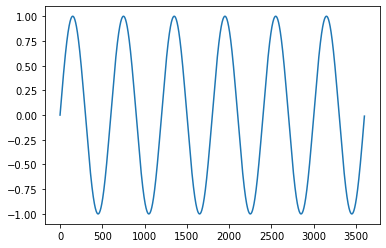

In [5]:
import matplotlib.pyplot as plt

plt.plot(t, s)
plt.show()

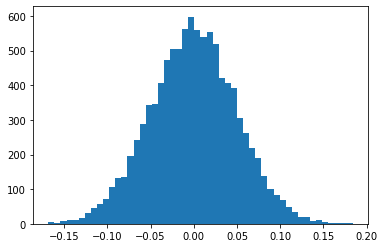

In [6]:
noise = np.random.normal(0.0, 0.05, size=10000)
plt.hist(noise, bins=50)
plt.show()

In [7]:
s = np.sin(t * phase) + np.random.normal(0.0, 0.05, size=len(t))

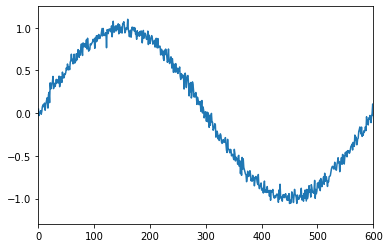

In [8]:
plt.plot(t, s)
plt.xlim(0,600)
plt.show()

## Schädigendes Ereignis simulieren

In [9]:
np.random.uniform()

0.29821109762757203

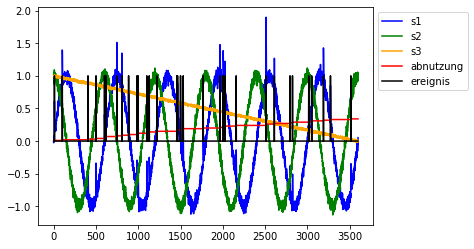

Anz. Abnutzungsereignisse = 34.0


In [10]:
ereignis_wkeit = 0.01

signal = np.array( [0.5, 0.4, 0.3, 0.2, 0.1] )
N = len(signal)
abnutzungs_werte = []
abnutzung = 0
ereignis = np.zeros(len(t))

s1 = np.sin(t * phase) + np.random.normal(0.0, 0.05, size=len(t))
s2 = np.cos(t * phase) + np.random.normal(0.0, 0.05, size=len(t))
s3 = 1.0 - t/3600 + np.random.normal(0.0, 0.01, size=len(t))

for i in range(len(t)):
    zufallszahl = np.random.uniform()
    if zufallszahl<ereignis_wkeit:
        ereignis[i] = 1
        s1[i:i+N] = s1[i:i+N] + signal
        abnutzung += 0.01                
    abnutzungs_werte.append(  abnutzung )
        
abnutzungs_werte = np.array( abnutzungs_werte )
        
plt.plot(t, s1, "blue", label="s1")
plt.plot(t, s2, "green", label="s2")
plt.plot(t, s3, "orange", label="s3")
plt.plot(t, abnutzungs_werte, "red", label="abnutzung")
plt.plot(t, ereignis, "black", label="ereignis")
#plt.xlim(0,600)
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.show()

print( f"Anz. Abnutzungsereignisse = {np.sum(ereignis)}" )

In [11]:
type(s1)

numpy.ndarray

In [12]:
type(abnutzungs_werte)

numpy.ndarray

In [13]:
len(s1)

3600

In [14]:
len(abnutzungs_werte)

3600

In [15]:
s1.shape

(3600,)

In [16]:
abnutzungs_werte.shape

(3600,)

# Tabelle zur besseren Übersicht

In [17]:
import pandas

d = {"s1":s1,
     "s2":s2,
     "s3":s3,
     "abnutzung": abnutzungs_werte,
     "ereignis": ereignis}

df = pandas.DataFrame(d)

In [18]:
df

,s1,s2,s3,abnutzung,ereignis
0,-0.019442,1.026886,0.988628,0.00,0.0
1,-0.025409,1.050811,1.000191,0.00,0.0
2,-0.011382,0.976468,0.988781,0.00,0.0
3,0.010496,0.984603,0.989398,0.00,0.0
4,0.064310,0.990977,1.001515,0.00,0.0
...,...,...,...,...,...
3595,-0.016133,1.055463,-0.007250,0.34,0.0
3596,-0.048971,0.982134,-0.011567,0.34,0.0
3597,-0.050499,1.021995,0.005780,0.34,0.0
3598,0.017079,0.922636,-0.011334,0.34,0.0


In [19]:
print( df.to_string()[:3000] )

            s1        s2        s3  abnutzung  ereignis
0    -0.019442  1.026886  0.988628       0.00       0.0
1    -0.025409  1.050811  1.000191       0.00       0.0
2    -0.011382  0.976468  0.988781       0.00       0.0
3     0.010496  0.984603  0.989398       0.00       0.0
4     0.064310  0.990977  1.001515       0.00       0.0
5     0.012968  1.035285  0.998872       0.00       0.0
6     0.086564  0.974313  1.003152       0.00       0.0
7     0.057256  0.867552  1.001679       0.00       0.0
8     0.146704  1.091467  0.998307       0.00       0.0
9     0.612278  1.000772  1.014449       0.01       1.0
10    0.502742  0.950048  1.017941       0.01       0.0
11    0.414576  0.980131  0.995168       0.01       0.0
12    0.202726  1.006502  0.995295       0.01       0.0
13    0.186368  1.054087  0.994628       0.01       0.0
14    0.205145  1.016729  0.996687       0.01       0.0
15    0.269724  0.987909  0.995098       0.01       0.0
16    0.146892  1.005325  1.002994       0.01   

# Trainings- und Testdaten vorbereiten

## Ein einzelnes Beispiel extrahieren

In [20]:
df.values

array([[-1.94421180e-02,  1.02688598e+00,  9.88627794e-01,
         0.00000000e+00,  0.00000000e+00],
       [-2.54087647e-02,  1.05081072e+00,  1.00019082e+00,
         0.00000000e+00,  0.00000000e+00],
       [-1.13823008e-02,  9.76468198e-01,  9.88780911e-01,
         0.00000000e+00,  0.00000000e+00],
       ...,
       [-5.04988396e-02,  1.02199486e+00,  5.78002602e-03,
         3.40000000e-01,  0.00000000e+00],
       [ 1.70792116e-02,  9.22636232e-01, -1.13337618e-02,
         3.40000000e-01,  0.00000000e+00],
       [ 5.18041154e-02,  1.02023515e+00, -1.81972899e-04,
         3.40000000e-01,  0.00000000e+00]])

In [21]:
df.shape

(3600, 5)

In [22]:
start = 20
window_size = 10
time_window = df.values[start:start+window_size]
time_window

array([[0.21820663, 1.01335336, 0.99399883, 0.01      , 0.        ],
       [0.23394823, 0.92031903, 0.97663436, 0.01      , 0.        ],
       [0.14999027, 1.03097305, 0.99013545, 0.01      , 0.        ],
       [0.20107662, 0.9280196 , 0.98868634, 0.01      , 0.        ],
       [0.16552865, 0.99966304, 1.00119153, 0.01      , 0.        ],
       [0.27253868, 0.95711648, 0.9960008 , 0.01      , 0.        ],
       [0.30263616, 1.02702676, 0.98705833, 0.01      , 0.        ],
       [0.26210853, 1.00065706, 0.98450913, 0.01      , 0.        ],
       [0.24859981, 1.00380661, 0.97658724, 0.01      , 0.        ],
       [0.32714236, 0.91460526, 0.99138659, 0.01      , 0.        ]])

In [23]:
def erzeuge_ein_beispiel(df, start, window_size):
    time_window = df.values[start:start+window_size]
    x = time_window[:,0:3].flatten()
    #y = time_window[:,4]
    y = sum(time_window[:,4])>0
    return x,y

In [24]:
x,y = erzeuge_ein_beispiel(df, 20, 10)

In [25]:
x

array([0.21820663, 1.01335336, 0.99399883, 0.23394823, 0.92031903,
       0.97663436, 0.14999027, 1.03097305, 0.99013545, 0.20107662,
       0.9280196 , 0.98868634, 0.16552865, 0.99966304, 1.00119153,
       0.27253868, 0.95711648, 0.9960008 , 0.30263616, 1.02702676,
       0.98705833, 0.26210853, 1.00065706, 0.98450913, 0.24859981,
       1.00380661, 0.97658724, 0.32714236, 0.91460526, 0.99138659])

In [26]:
y

False

## Alle Beispiele erzeugen

In [27]:
window_size = 10
t_bis = 3600-window_size
inp = np.zeros((t_bis,window_size*3))
out = np.zeros((t_bis,1))

In [28]:
inp.shape

(3590, 30)

In [29]:
out.shape

(3590, 1)

In [30]:
print( inp[0], "-->", out[0] )

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.] --> [0.]


In [31]:
zeile = 0
for time_step in range(0,t_bis):
    x,y = erzeuge_ein_beispiel(df, time_step, window_size)
    inp[zeile,:] = x
    out[zeile,:] = y
    zeile += 1
    
    if zeile<30:
        print( x, "-->", y )

[-0.01944212  1.02688598  0.98862779 -0.02540876  1.05081072  1.00019082
 -0.0113823   0.9764682   0.98878091  0.01049643  0.98460291  0.98939797
  0.06431047  0.99097707  1.00151531  0.01296783  1.03528487  0.99887225
  0.08656382  0.97431275  1.00315174  0.05725616  0.86755176  1.00167901
  0.14670408  1.09146695  0.99830659  0.61227819  1.00077235  1.01444866] --> True
[-0.02540876  1.05081072  1.00019082 -0.0113823   0.9764682   0.98878091
  0.01049643  0.98460291  0.98939797  0.06431047  0.99097707  1.00151531
  0.01296783  1.03528487  0.99887225  0.08656382  0.97431275  1.00315174
  0.05725616  0.86755176  1.00167901  0.14670408  1.09146695  0.99830659
  0.61227819  1.00077235  1.01444866  0.50274151  0.95004824  1.01794117] --> True
[-0.0113823   0.9764682   0.98878091  0.01049643  0.98460291  0.98939797
  0.06431047  0.99097707  1.00151531  0.01296783  1.03528487  0.99887225
  0.08656382  0.97431275  1.00315174  0.05725616  0.86755176  1.00167901
  0.14670408  1.09146695  0.998

In [32]:
print( inp[0], "-->", out[0] )

[-0.01944212  1.02688598  0.98862779 -0.02540876  1.05081072  1.00019082
 -0.0113823   0.9764682   0.98878091  0.01049643  0.98460291  0.98939797
  0.06431047  0.99097707  1.00151531  0.01296783  1.03528487  0.99887225
  0.08656382  0.97431275  1.00315174  0.05725616  0.86755176  1.00167901
  0.14670408  1.09146695  0.99830659  0.61227819  1.00077235  1.01444866] --> [1.]


## Aufspaltung der Beispiele in Trainings- und Testdaten

In [33]:
inp.shape

(3590, 30)

In [34]:
out.shape

(3590, 1)

In [35]:
N = int(len(inp)*0.6)
N

2154

In [36]:
x_train = inp[:N]
y_train = out[:N]
x_test = inp[N:]
y_test = out[N:]

In [37]:
x_train.shape

(2154, 30)

In [38]:
y_train.shape

(2154, 1)

In [39]:
x_test.shape

(1436, 30)

In [40]:
y_test.shape

(1436, 1)

# NN erzeugen und trainieren

In [41]:
nr_inputs = x_test.shape[1]
nr_inputs

30

2022-06-23 12:54:35.030792: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-23 12:54:35.030809: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                310       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


2022-06-23 12:54:36.063450: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 12:54:36.063895: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-23 12:54:36.063937: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-23 12:54:36.063974: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-23 12:54:36.064011: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Training Start
Training Ende


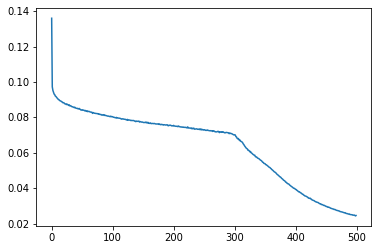

In [42]:
from tensorflow import keras

m = keras.Sequential()
l0 = keras.layers.Input(shape=(nr_inputs,))
l1 = keras.layers.Dense(10, activation="relu")
l2 = keras.layers.Dense(1)
m.add( l0 )
m.add( l1 )
m.add( l2 )
m.summary()

m.compile(optimizer="sgd", loss=keras.losses.MeanSquaredError())

print("Training Start")
history = m.fit(x_train,y_train, epochs=500, verbose=0)
print("Training Ende")

import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.show()

# NN testen auf Testdaten

In [43]:
x_test.shape

(1436, 30)

In [44]:
x_test[0]

array([-0.52901714, -0.92945428,  0.41747353, -0.628771  , -0.80202873,
        0.38927366, -0.57164981, -0.89425725,  0.39956891, -0.45077515,
       -0.75096849,  0.38693809, -0.13572831, -0.84464833,  0.3932573 ,
       -0.15714196, -0.81050043,  0.40230041, -0.33169672, -0.75427767,
        0.39423427, -0.33850526, -0.7907604 ,  0.396572  , -0.53479204,
       -0.82029506,  0.38271357, -0.61159383, -0.85212298,  0.40822813])

In [45]:
y_test[1]

array([1.])

In [46]:
preds = m.predict( x_test ).flatten()
preds

array([0.73703605, 0.64816576, 0.26587194, ..., 0.03443698, 0.05157067,
       0.12566397], dtype=float32)

In [47]:
preds.shape

(1436,)

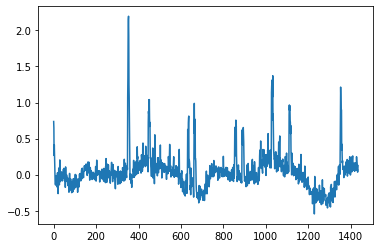

In [48]:
plt.plot(preds)
plt.show()

In [49]:
preds_binary = preds>0.5

In [50]:
preds_binary.shape

(1436,)

In [51]:
preds_binary[:5]

array([ True,  True, False, False, False])

In [52]:
sum(preds_binary==0)

1368

In [53]:
sum(preds_binary==1)

68

In [54]:
sum(y_test.flatten()==0)

1340

In [55]:
sum(y_test.flatten()==1)

96

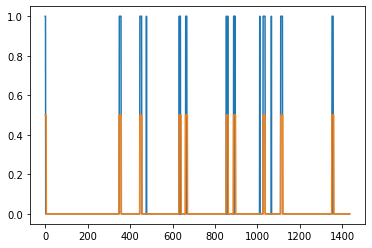

In [56]:
plt.plot(preds_binary)
plt.plot(y_test.flatten()*0.5)
#plt.xlim(0,200)
plt.show()

In [57]:
y_test.flatten()

array([1., 1., 1., ..., 0., 0., 0.])

In [58]:
nr_errors = sum(abs(preds_binary - y_test.flatten()))
nr_errors

34.0

In [59]:
percent_errors = (nr_errors / len(x_test))*100.0
percent_errors

2.3676880222841223

# NN testen auf Trainingsdaten

In [60]:
preds = m.predict( x_train ).flatten()
preds_binary = preds>0.5

In [61]:
sum(preds_binary==0)

1975

In [62]:
sum(preds_binary==1)

179

In [63]:
sum(y_train.flatten()==0)

1928

In [64]:
sum(y_train.flatten()==1)

226

In [65]:
nr_errors = sum(abs(preds_binary - y_train.flatten()))
nr_errors

47.0

In [66]:
percent_errors = (nr_errors / len(x_test))*100.0
percent_errors

3.2729805013927575

# Alles in einer Codezelle

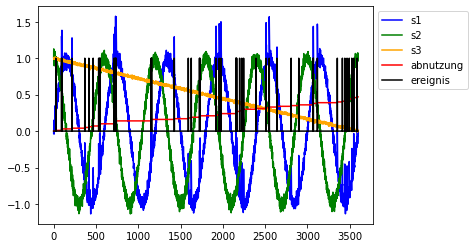

Anz. Abnutzungsereignisse = 47.0
[-2.94480097e-02  1.01779338e+00  1.00799360e+00  3.04824950e-02
  1.12783321e+00  9.91572268e-01  9.05495925e-05  9.13887320e-01
  1.00075026e+00  1.01066677e-01  9.75916983e-01  9.94542216e-01
 -4.15324781e-02  9.17302085e-01  9.92481216e-01  2.83005801e-02
  9.16948625e-01  9.85959423e-01  5.22608380e-02  1.03053139e+00
  1.00291078e+00  1.53536676e-01  8.95814893e-01  9.97760721e-01
  1.35432776e-02  9.81403781e-01  9.99361478e-01  1.96517535e-02
  1.04291027e+00  1.00479044e+00] --> False
[ 3.04824950e-02  1.12783321e+00  9.91572268e-01  9.05495925e-05
  9.13887320e-01  1.00075026e+00  1.01066677e-01  9.75916983e-01
  9.94542216e-01 -4.15324781e-02  9.17302085e-01  9.92481216e-01
  2.83005801e-02  9.16948625e-01  9.85959423e-01  5.22608380e-02
  1.03053139e+00  1.00291078e+00  1.53536676e-01  8.95814893e-01
  9.97760721e-01  1.35432776e-02  9.81403781e-01  9.99361478e-01
  1.96517535e-02  1.04291027e+00  1.00479044e+00  1.01842308e-01
  1.00069370e

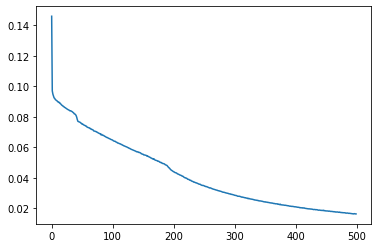

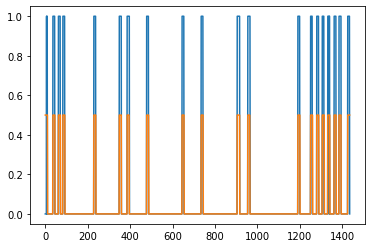

Anzahl Fehler:  27.0
Prozent Fehler:  1.8802228412256268


In [10]:
# 1. Erzeuge Zeitreihen
########################
import numpy as np
import matplotlib.pyplot as plt
max_time = 3600
dt = 1
t = np.arange(0.0, 3600.0, dt)

ereignis_wkeit = 0.01
signal = np.array( [0.5, 0.4, 0.3, 0.2, 0.1] )
N = len(signal)
abnutzungs_werte = []
abnutzung = 0
ereignis = np.zeros(len(t))

phase = 2*np.pi / 600.0
s1 = np.sin(t * phase) + np.random.normal(0.0, 0.05, size=len(t))
s2 = np.cos(t * phase) + np.random.normal(0.0, 0.05, size=len(t))
s3 = 1.0 - t/3600 + np.random.normal(0.0, 0.01, size=len(t))

for i in range(len(t)):
    zufallszahl = np.random.uniform()
    if zufallszahl<ereignis_wkeit:
        ereignis[i] = 1
        s1[i:i+N] = s1[i:i+N] + signal
        abnutzung += 0.01                
    abnutzungs_werte.append(  abnutzung )
        
abnutzungs_werte = np.array( abnutzungs_werte )
        
plt.plot(t, s1, "blue", label="s1")
plt.plot(t, s2, "green", label="s2")
plt.plot(t, s3, "orange", label="s3")
plt.plot(t, abnutzungs_werte, "red", label="abnutzung")
plt.plot(t, ereignis, "black", label="ereignis")
#plt.xlim(0,600)
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.show()

print( f"Anz. Abnutzungsereignisse = {np.sum(ereignis)}" )


# 2. Erstelle Tabelle zur besseren Übersicht
########################
import pandas
d = {"s1":s1,
     "s2":s2,
     "s3":s3,
     "abnutzung": abnutzungs_werte,
     "ereignis": ereignis}
df = pandas.DataFrame(d)


# 3. Hilfsfunktion um ein Beispiel aus Zeitreihe zu erzeugen
########################
def erzeuge_ein_beispiel(df, start, window_size):
    time_window = df.values[start:start+window_size]
    x = time_window[:,0:3].flatten()
    #y = time_window[:,4]
    y = sum(time_window[:,4])>0
    return x,y


# 4. Alle Beispiele erzeugen
########################
window_size = 10
t_bis = 3600-window_size
inp = np.zeros((t_bis,window_size*3))
out = np.zeros((t_bis,1))

zeile = 0
for time_step in range(0,t_bis):
    x,y = erzeuge_ein_beispiel(df, time_step, window_size)
    inp[zeile,:] = x
    out[zeile,:] = y
    zeile += 1
    
    if zeile<5:
        print( x, "-->", y )
        
        
# 5. Aufspaltung in Trainings- und Testdaten
############################################
N = int(len(inp)*0.6)
x_train = inp[:N]
y_train = out[:N]
x_test = inp[N:]
y_test = out[N:]


# 6. NN erzeugen und trainieren
###############################
from tensorflow import keras

nr_inputs = x_test.shape[1]
m = keras.Sequential()
l0 = keras.layers.Input(shape=(nr_inputs,))
l1 = keras.layers.Dense(10, activation="relu")
l2 = keras.layers.Dense(1)
m.add( l0 )
m.add( l1 )
m.add( l2 )
m.summary()

m.compile(optimizer="sgd", loss=keras.losses.MeanSquaredError())

print("Training Start")
history = m.fit(x_train,y_train, epochs=500, verbose=0)
print("Training Ende")

import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.show()


# 7. NN testen
##############
preds = m.predict( x_test ).flatten()
preds_binary = preds>0.5
plt.plot(preds_binary)
plt.plot(y_test.flatten()*0.5)
plt.show()

nr_errors = sum(abs(preds_binary - y_test.flatten()))
print("Anzahl Fehler: ", nr_errors)
percent_errors = (nr_errors / len(x_test))*100.0
print("Prozent Fehler: ", percent_errors)